# NFL Game Outcome Prediction
This project aims to predict the outcomes (win/loss) of NFL games using a Random Forest model. 
Key features include rushing attempts, passing attempts, sacks allowed, and other game statistics. 
The dataset is sourced from NFL FastR, and this notebook details the data preprocessing, model training, and evaluation.


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


## Data Collection and Description
The dataset used for this project is fetched from NFL FastR. It includes game-level statistics for NFL teams, 
such as rushing yards, passing yards, sacks allowed, and points scored.


In [ ]:
#Load the dataset
data = pd.read_csv('team_game_stats.csv')  
data.head()

,game_id,rush_attempt,pass_attempt,sack,passing_yards,rushing_yards,home_team,away_team,total_home_score,total_away_score,is_home_team,win
0,2024_01_ARI_BUF,26.0,35.0,4.0,162.0,124.0,BUF,ARI,34,28,False,0
1,2024_01_ARI_BUF,33.0,25.0,2.0,232.0,130.0,BUF,ARI,34,28,True,1
2,2024_01_BAL_KC,32.0,42.0,1.0,273.0,185.0,KC,BAL,27,20,False,0
3,2024_01_BAL_KC,20.0,30.0,2.0,291.0,72.0,KC,BAL,27,20,True,1
4,2024_01_CAR_NO,20.0,35.0,4.0,161.0,58.0,NO,CAR,47,10,False,0


## Data Preprocessing
### Steps:
1. Handle missing values.
2. Select relevant features for the model.
3. Create a target variable: Win (1) / Loss (0).
4. Split the data into training and testing sets.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#1. Define features and target
features = ['rush_attempt', 'pass_attempt', 'sack', 'passing_yards', 'rushing_yards']
X = data[features]
y = data['win']

#2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#4. Evaluate the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7910447761194029
Confusion Matrix:
 [[23  6]
 [ 8 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.83      0.79      0.81        38

    accuracy                           0.79        67
   macro avg       0.79      0.79      0.79        67
weighted avg       0.79      0.79      0.79        67



## Step 5: Model Evaluation

In this step, we evaluate the performance of the Random Forest model and analyze the importance of each feature.


### Feature Importance:
We analyze the contribution of each feature to the predictions using the model's feature importance scores.


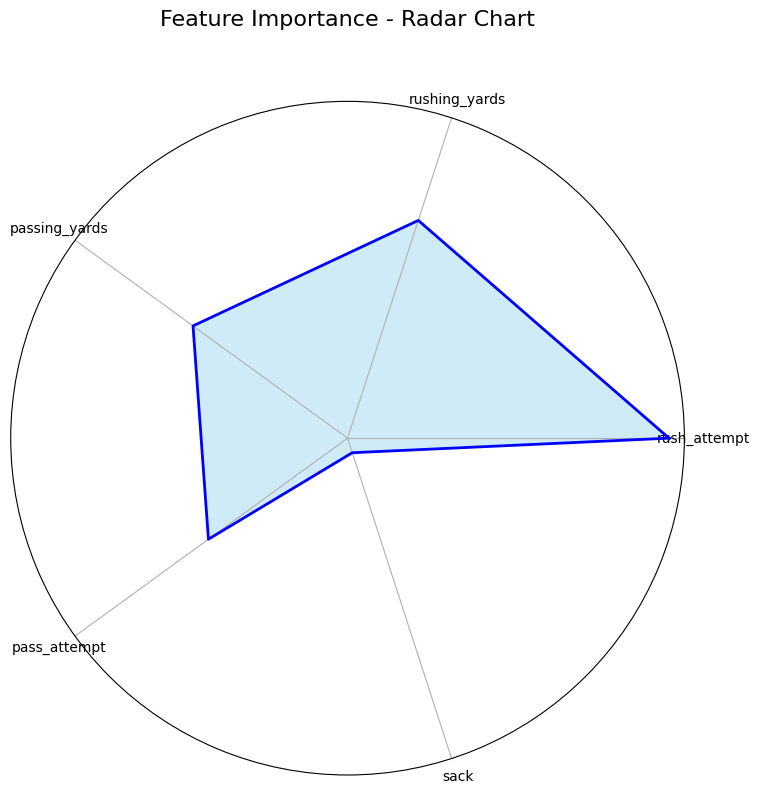

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Get feature importances from the model
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

#Prepare data for radar chart
labels = importance_df['Feature']
values = importance_df['Importance']
num_vars = len(labels)

#Create angles for each feature
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

#Complete the loop for radar chart (return to starting point)
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticks([]) 
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Feature Importance - Radar Chart', size=16, y=1.1)
plt.tight_layout()
plt.show()


## Step 6: Model Comparison

In this step, we compare the performance of different models, including the Random Forest model, Logistic Regression, Support Vector Machines (SVM), and Gradient Boosting.

### Metrics Evaluated:
1. **Accuracy:** Percentage of correct predictions.
2. **F1 Score:** A balanced measure of precision and recall.
3. **Bar Chart** A bar chart compares the performance of each model on the test set.


<Figure size 1000x600 with 0 Axes>

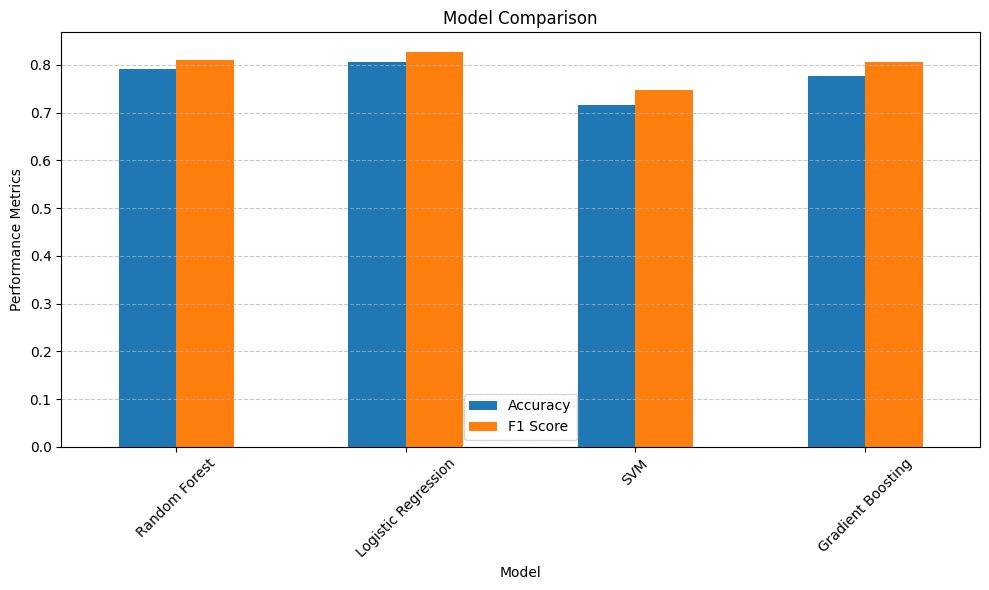

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

#Define models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

#Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})

#Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

#Plot model comparison
plt.figure(figsize=(10, 6))
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Performance Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
